# **Updated Naive Bayes Model for Cardiovascular Disease Prediction**

## **<>Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score

# <>Path and Data-Preprocessing

In [2]:
path = "/content/Cardiovascular_Disease_Dataset.csv"
df = pd.read_csv(path)



## Exploratory Data Analysis

In [3]:
print("Data Types and Non-null Counts:\n", df.info(), "\n")
print("Descriptive Statistics:\n", df.describe(), "\n")
print("Missing Values Count:\n", df.isnull().sum(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
Data Types and Non-null Counts:
 None 

Descriptive Statistics:
         

## Dropping unnecessary columns

In [4]:
df.drop(columns=["patientid"], inplace=True)

## <>Selection of features and labels

In [5]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


# <>Splitting dataset into training and testing sets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


# <>Feature Scalling
# ->Normalization
## ->Standardisation

In [7]:
scalable = ["age", "restingBP", "serumcholestrol", "maxheartrate", "oldpeak"]
train_df = pd.DataFrame(x_train, columns=df.columns[:-1])
test_df = pd.DataFrame(x_test, columns=df.columns[:-1])

scaler = StandardScaler()
train_df[scalable] = scaler.fit_transform(train_df[scalable])
test_df[scalable] = scaler.transform(test_df[scalable])

x_train = train_df.values
x_test = test_df.values


# <>Distribution graph for each label separately for training and testing data

In [8]:
print("Train class distribution:")
[print(f"Class {i}: {c}") for i, c in enumerate(np.bincount(y_train))]
print("Test class distribution:")
[print(f"Class {i}: {c}") for i, c in enumerate(np.bincount(y_test))]

Train class distribution:
Class 0: 325
Class 1: 475
Test class distribution:
Class 0: 95
Class 1: 105


[None, None]

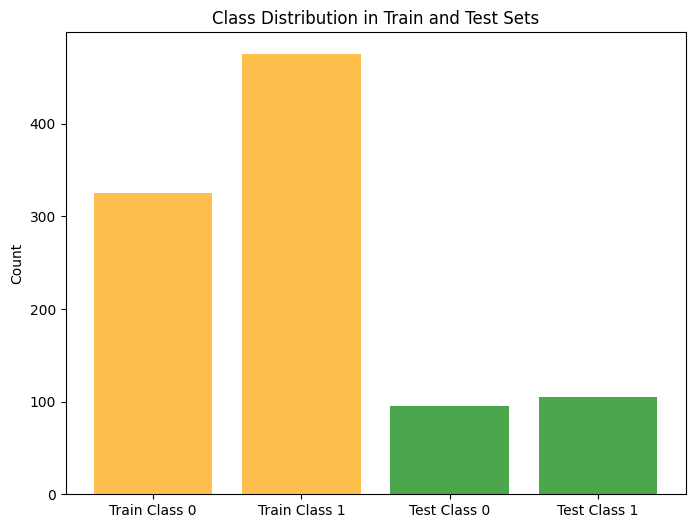

In [9]:
plt.figure(figsize=(8, 6))
plt.bar(['Train Class 0', 'Train Class 1'], np.bincount(y_train), color='orange', alpha=0.7)
plt.bar(['Test Class 0', 'Test Class 1'], np.bincount(y_test), color='green', alpha=0.7)
plt.title("Class Distribution in Train and Test Sets")
plt.ylabel("Count")
plt.show()



# <>Naive Bayes Classifier initialisation

In [10]:
nvbcf = GaussianNB()

## <>Training and testing the model

In [11]:
nvbcf.fit(x_train, y_train)

GaussianNB()

In [12]:
# <>Predict the labels based on test results

In [14]:
y_pred = nvbcf.predict(x_test)


# <>Model Evaluation and performance matrices
# ->Accuracy

In [15]:
acc = accuracy_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
print(f"Accuracy: {acc:.2f}%")
print(f"Recall: {recall:.2f}%")

Accuracy: 95.00%
Recall: 97.14%


## ->Confusion Matrix

Confusion Matrix:
 [[ 88   7]
 [  3 102]]


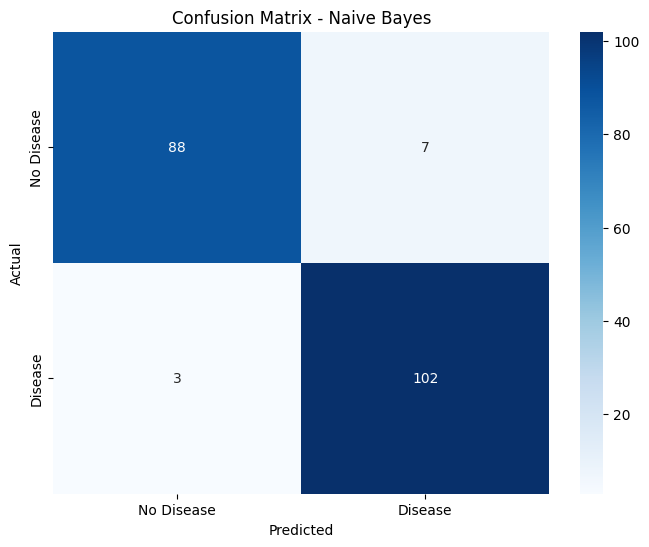

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ->Classification Report

In [17]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        95
           1       0.94      0.97      0.95       105

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



# <>Feature Importance
# Naive Bayes does not support traditional feature importance like tree-based models.
# This section is intentionally omitted.

In [18]:
print("Naive Bayes model does not support direct feature importance analysis.")

Naive Bayes model does not support direct feature importance analysis.


# <>Hyperparameter Tunning
# Note: Very limited tuning possible with GaussianNB, mainly 'var_smoothing'

In [19]:

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=3, scoring='recall')
grid_search.fit(x_train, y_train)
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'var_smoothing': np.float64(0.012328467394420659)}


# <>Model evaluation after Hypertunning

Accuracy after tuning: 95.00%
Recall after tuning: 97.14%
Confusion Matrix after Hypertuning:
 [[ 88   7]
 [  3 102]]


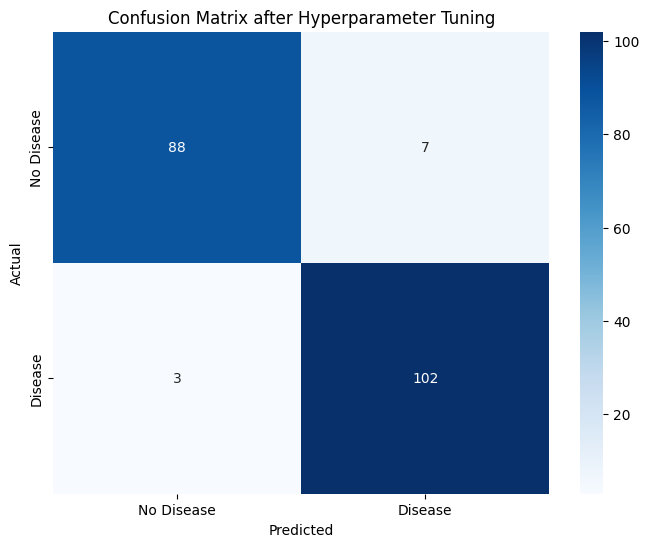

Classification Report after Hypertuning:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        95
           1       0.94      0.97      0.95       105

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [20]:
best_nvbcf = grid_search.best_estimator_
best_nvbcf.fit(x_train, y_train)

y_pred_best = best_nvbcf.predict(x_test)

acc_after = accuracy_score(y_test, y_pred_best) * 100
recall_after = recall_score(y_test, y_pred_best) * 100
print(f"Accuracy after tuning: {acc_after:.2f}%")
print(f"Recall after tuning: {recall_after:.2f}%")

cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix after Hypertuning:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix after Hyperparameter Tuning")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report after Hypertuning:")
print(classification_report(y_test, y_pred_best))